In [1]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)
import os


Mounted at /content/gdrive/


In [2]:
%cd /content/gdrive/My Drive/mask_face_detection/yolov4


/content/gdrive/My Drive/mask_face_detection/yolov4


In [ ]:
# first time setup
# !git clone https://github.com/quangnhat185/darknet_for_colab.git
# %cd darknet_for_colab
# !make
# !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137


/content/gdrive/My Drive/darknet_for_colab


93
20200211202046-GettyImages-863571826.txt: 
1 0.496429 0.288571 0.184286 0.411429

images-9.txt: 
0 0.485455 0.480874 0.803636 0.950820

Chris-Pratt.txt: 
1 0.553955 0.484049 0.421387 0.833984

87.txt: 
0 0.275000 0.225694 0.175000 0.270833
0 0.575781 0.293981 0.132812 0.208333
0 0.838281 0.342593 0.104688 0.185185



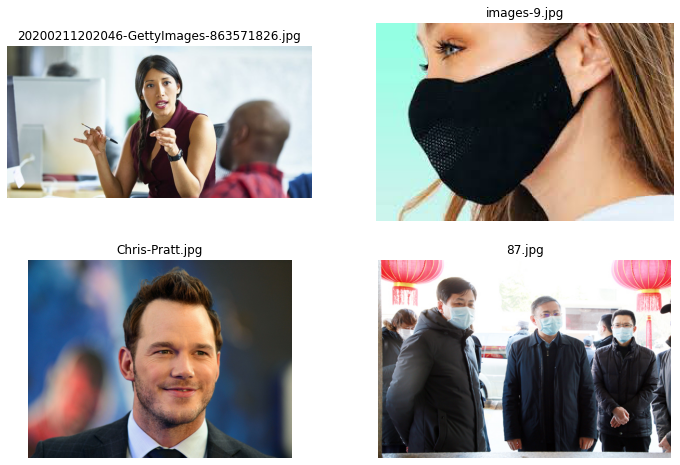

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob

def read_label(image_path):
  file_name = image_path.replace('.jpg', '.txt')
  with open(file_name, 'rt') as file:
    print(os.path.basename(file_name) + ': \n' + file.read())

image_path = glob.glob("data/training/*.jpg")
print(len(image_path))
fig = plt.figure(figsize=(12,8))
cols = 2
rows = 2
grid = gridspec.GridSpec(nrows=rows, ncols=cols, figure=fig)
for i in range(cols*rows):
  fig.add_subplot(grid[i])
  image=plt.imread(image_path[i])
  plt.title(os.path.basename(image_path[i]))
  plt.axis(False)
  plt.imshow(image)
  read_label(image_path[i])

plt.savefig("dataset_examples.jpg", dpi=300)

In [ ]:
# prepare for trainng and test samples
import random
rand_nums = [1,2]
distribution = [.7, .3]
train_file = open("data/train.txt", "a")
test_file = open("data/test.txt", "a")
for i in range(len(image_path)):
  rand_num = random.choices(rand_nums, distribution)
  if (rand_num[0] ==1):
      train_file.write(image_path[i]+"\n")
  if (rand_num[0] ==2):
      test_file.write(image_path[i]+"\n")
test_file.close()
train_file.close()


In [ ]:
!python python/yolov4_setup.py

python3: can't open file 'yolov4_setup.py': [Errno 2] No such file or directory


In [ ]:
# training
!cp backup/* weights_backup
!chmod +x ./darknet
!./darknet detector train data/yolov4.data cfg/yolov4_custom_train.cfg yolov4.conv.137 -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 150 Avg (IOU: 0.341136, GIOU: 0.249922), Class: 0.461185, Obj: 0.541826, No Obj: 0.531883, .5R: 0.156863, .75R: 0.000000, count: 51, class_loss = 602.464966, iou_loss = 2.734497, total_loss = 605.199463 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 161 Avg (IOU: 0.308132, GIOU: 0.218435), Class: 0.467804, Obj: 0.415830, No Obj: 0.464944, .5R: 0.136364, .75R: 0.045455, count: 22, class_loss = 121.950569, iou_loss = 0.243904, total_loss = 122.194473 
 total_bbox = 39613, rewritten_bbox = 0.020195 % 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 139 Avg (IOU: 0.408417, GIOU: 0.321134), Class: 0.532076, Obj: 0.455464, No Obj: 0.459426, .5R: 0.277778, .75R: 0.000000, count: 18, class_loss = 1820.010376, iou_loss = 6.238647, total_loss = 1826.249023 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 150 Avg (IOU: 0.374469, GIOU: 0.321226), Class: 0.441549, Obj

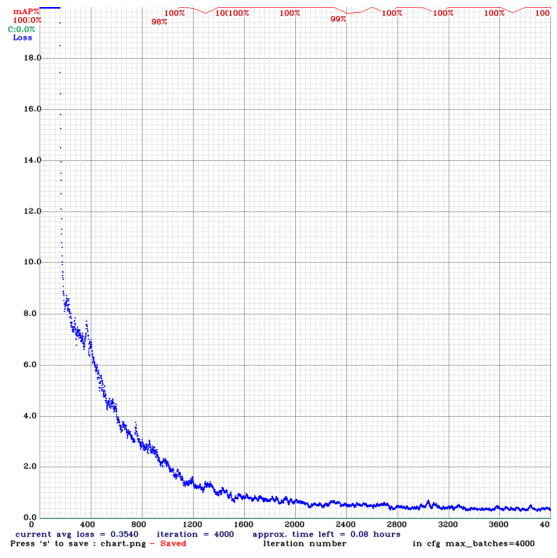

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
train_result = plt.imread("chart.png")
plt.axis(False)
plt.imshow(train_result)

In [ ]:
# training weights at /backup
!ls -lrt backup

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
ls: cannot access 'backup': Transport endpoint is not connected


In [ ]:
# test out our detector!
# coco.names is hardcoded somewhere in the detector
# output at ./predictions.jpg
%cp data/yolov4.data cfg/coco.data
!chmod +x ./darknet
img_path = "example_input/42169.jpg"
!./darknet detect cfg/yolov4_custom_test.cfg backup/yolov4_custom_train_last.weights {img_path} -dont-show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 0, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 

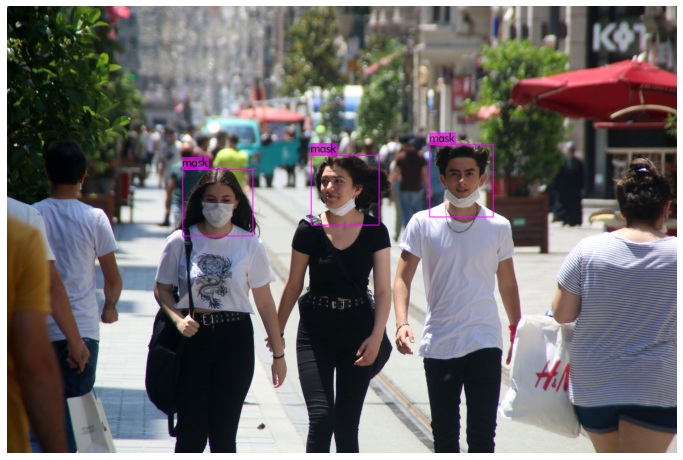

In [ ]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(12,12))
plt.axis(False)
processed_image = plt.imread("./predictions.jpg")
plt.imshow(processed_image)

In [ ]:
# test out our detector!
# coco.names is hardcoded somewhere in the detector
# output at ./predictions.jpg
%cp data/yolov4.data cfg/coco.data
!python python/darknet_video.py -v example_input/test_mask.mov -c cfg/yolov4_custom_test.cfg -w backup/yolov4_custom_train_last.weights -o example_output/output.mp4

 Try to load cfg: cfg/yolov4_custom_test.cfg, weights: backup/yolov4_custom_train_last.weights, clear = 0 
 0 : compute_capability = 700, cudnn_half = 0, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 -